# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports:

In [3]:
# First all used packages are loaded 
import numpy as np 
from scipy import optimize 
import matplotlib.pyplot as plt 
import math

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

To solve the maximization problem given in eq. (1), we define the variables, utility function labor supply, and set up our equilibrium of having consumption equal to total resources. We then maximize the utility function with respect to our constraints by printing the optimal labor supply, optimal consumption, and utility.

In [4]:
# Following variables is known
m   = 1
v   = 10
e   = 0.3
t0  = 0.4
t1  = 0.1
k   = 0.4
w   = 0.5

# Now the model equations are defined

def x(m,w,l,t0,t1,k): 
    """x equals the optimal consumption"""

    return m + w*l - (t0*w*l + t1*max(w*l-k,0))

def utility(l,c,e,v):
    return math.log(c) - v * ((l** (1+(1/e)))/(1+ (1/e)))

def labor_supply(l,e,v,m,w,t0,t1,k):
    c = x(m,w,l,t0,t1,k)
    return -utility(l,c,e,v)

def supply_problem(e,v,m,w,t0,t1,k):
    solution =  optimize.minimize_scalar(labor_supply,method='bounded', \
                bounds=(0,1), args=(e,v,m,w,t0,t1,k))
    l = solution.x
    c = x(m,w,l,t0,t1,k)
    u = utility(l,c,e,v)
    return l,c,u

# and the optimal values can now be printed as the constructed function solves eq. (1)
l_star = supply_problem(e,v,m,w,t0,t1,k)[0]
c_star = supply_problem(e,v,m,w,t0,t1,k)[1]
u_star = supply_problem(e,v,m,w,t0,t1,k)[2]

print(f'Optimized labour supply is: {l_star:.2f}')
print(f'Optimized consumption is:  {c_star:.2f}')
print(f'Optimal utility is: {u_star:.2f}')

Optimized labour supply is: 0.34
Optimized consumption is:  1.10
Optimal utility is: 0.08


# Question 2

To Plot $l^*$ and $c^*$ as a function of $w$ in the range of 0.5 and 1.5, we set up a vector $w_i$ that follows a uniform distribution as $w_i \sim U(0.5,1.5)$ with N = 10,000. Secondly, we empty the lists for $l$ and $c$ and generate a loop to return the optimal level of consumption and labor supply given the wage.

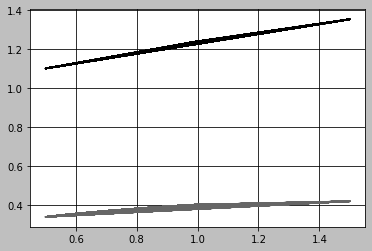

In [5]:

# A vector for w is created
N       = 10000
w_vec   = np.random.uniform(0.5, 1.5, size=N)

# empty lists for l and c is created
c_vec = np.empty(N)
l_vec = np.empty(N)

# a loop is generated to create optimal value of consumption \ 
# and labor supply given the wage

for i, w in enumerate(w_vec):
    opt = supply_problem(e,v,m,w_vec[i],t0,t1,k)
    c_vec[i] = opt[0]
    l_vec[i] = opt[1]

# now the plots can be printed
plt.style.use('grayscale')
plt.plot(w_vec,l_vec)
plt.plot(w_vec,c_vec)
plt.grid(True)
plt.show()

# Question 3

Total tax revenue is calculated and printed as a function of the number in the entire population and each individual in the population's tax revenue.

In [6]:
# A function to return the total tax revenue is created
np.random.seed(4600)
PopulationWageLarge = np.random.uniform(0.5,1.5,size=10000)

def TotalTax(PopulationWageVec,e,v,t0,t1,k,m):

#Return an array for individual tax payments
    N=len(PopulationWageVec)
    PopulationTaxes=np.zeros((N))

    for i,w in enumerate(PopulationWageVec):
        #Return optimal labour supply given optimize functions in Q1
        Ind_optimum=supply_problem(e,v,m,w,t0,t1,k)
        IndLabour=Ind_optimum[0]
        #Optimal invidual taxpayment with optimal labor
        PopulationTaxes[i]=t0*w*IndLabour+t1*max(w*IndLabour-k,0)
    #Sum
    TotTax=sum(PopulationTaxes)
    return TotTax

#Total tax functions with random uniform dis.
TotTax0 = TotalTax(PopulationWageLarge,e,v,t0,t1,k,m)
print(f'The total tax revenue is {TotTax0:.1f}')

The total tax revenue is 1627.2


# Question 4

We now change the Frisch elasticity of labor supply, $\epsilon$, from 0.3 to 0.1 and print the new tax revenue using the same formula as created in question 3.

In [7]:
# Frisch Elasticity changed from 0.3 to 0.1
e_new = 0.1

# The new total tax revenue can now be calculated and printed
TotTax_e_new = TotalTax(PopulationWageLarge,e_new,v,t0,t1,k,m)
print(f'The total tax revenue is {TotTax_e_new:.1f}')

The total tax revenue is 3191.2


# Question 5

ADD ANSWER.

In [10]:
# A smaller population size is defined to easen the calculations
PopulationWageSmall = np.random.uniform(0.5,1.5,size=100)

def value_of_choice_tax(taxes,PopulationWage,e,v,m):
    
    t0  = taxes[0]
    t1  = taxes[1]
    k   = taxes[2]
    return -TotalTax(PopulationWage,e,v,t0,t1,k,m)

# Finds the tax maximising values of the vector 'taxes'.
def taxOptimiser(PopulationWage,e,v,m):
    
    initial_guess   = [0.8,0.6,0.5]
    sol_case3       = optimize.minimize(
        value_of_choice_tax,initial_guess,method='Nelder-Mead',args=(PopulationWage,e,v,m))

    t0Star  = sol_case3.x[0]
    t1Star  = sol_case3.x[1]
    kStar   = sol_case3.x[2]

    # Print the solution   
    print(f'Optimal standard income tax rate is {t0Star:.3f}')
    print(f'Optimal top bracet tax rate is {t1Star:.3f}')
    print(f'Optimal cut-off income is {kStar:.3f}')
    
    return[t0Star,t1Star,kStar]

print('Optimal taxe rates and revenue, with N=100')
[t0Star,t1Star,kStar]= taxOptimiser(PopulationWageSmall,e,v,m)
TotTaxSmall = TotalTax(PopulationWageLarge,e,v,t0Star,t1Star,kStar,m)
print(f'Total tax revenue = {TotTaxSmall:.2f}')

print('Optimal taxe rates and revenue, with N=10000')
[t0Star,t1Star,kStar]=taxOptimiser(PopulationWageLarge,e,v,m)
TotTaxLarge = TotalTax(PopulationWageLarge,e,v,t0Star,t1Star,kStar,m)
print(f'Total tax revenue = {TotTaxLarge:.2f}')

Optimal taxe rates and revenue, with N=100
Optimal standard income tax rate is 0.786
Optimal top bracet tax rate is 0.624
Optimal cut-off income is 0.532
Total tax revenue = 2462.34
Optimal taxe rates and revenue, with N=10000
Optimal standard income tax rate is 0.785
Optimal top bracet tax rate is 0.577
Optimal cut-off income is 0.536
Total tax revenue = 2462.34


# Conclusion

ADD CONCISE CONLUSION.